# How to work with PDS Index files

In this tutorial, we will learn how to work with PDS Index files.

These files contain metadata about the observations and they were mostly provided for data that was delivered in the PDS3 format.

We first will look at the tree list of instrument data indexes that `planetarypy` is so far supporting.

Then we will have a look at several utility functions that help receiving the structures contained in this tree and finally the most important function `get_index` that retrieves the index file as a pandas DataFrame.

# Working with PDS Index files

One of the major features of `planetarypy` is the ability to work with PDS Index files as part of its general agenda of helping users retrieving data of interest.

To this end, `planetarypy` provides a set of functions that allow you to work with PDS Index files:

In [1]:
from planetarypy.pds import (
    print_available_indexes,
    get_mission_names,
    get_instrument_names,
    get_index_names,
    get_index,
)

### Logging output. 
If you want to know more about what is happening behind the scenes, use the next cell to activate various levels of logging details.

In [3]:
# planetarypy configures INFO level of logging by default but the user should switch it on:
from loguru import logger

logger.enable("planetarypy")

# To see all debug messages of planetarypy instead, use:
# import planetarypy
# planetarypy.enable_logging("DEBUG")

# To see only warnings and errors, use:
# planetarypy.enable_logging("WARNING")


# If you want to play with new code in here and want to log stuff, use a notebook-specific logger:
def create_nb_logger():
    import sys
    from loguru import logger

    nb_logger = logger.bind(context="notebook")
    nb_logger.add(
        sys.stdout,
        level="INFO",
        filter=lambda r: r["extra"].get("context") == "notebook",
    )


# Use nb_logger.info(), nb_logger.debug(), etc. for your notebook code

## The overview
`print_available_indexes()` provides a tree-like overview of all instrument data indexes currently supported in `planetarypy`.

In [4]:
print_available_indexes()

PDS Indexes Configuration:
├── cassini
│   ├── iss
│   │   ├── index
│   │   ├── inventory
│   │   ├── moon_summary
│   │   ├── ring_summary
│   │   └── saturn_summary
│   └── uvis
│       ├── index
│       ├── moon_summary
│       ├── ring_summary
│       ├── saturn_summary
│       ├── supplemental_index
│       └── versions
├── go
│   └── ssi
│       ├── body_summary
│       ├── index
│       ├── jupiter_summary
│       ├── moon_summary
│       ├── ring_summary
│       ├── sky_summary
│       └── supplemental_index
├── lro
│   ├── diviner
│   │   ├── edr1
│   │   ├── edr2
│   │   ├── rdr1
│   │   └── rdr2
│   ├── lola
│   │   ├── edr
│   │   └── rdr
│   └── lroc
│       └── edr
├── mer
│   ├── opportunity
│   │   └── pancam_rdr
│   └── spirit
│       └── pancam_rdr
└── mro
    ├── crism
    │   └── mtrdr
    ├── ctx
    │   └── edr
    └── hirise
        ├── dtm
        ├── edr
        └── rdr


The index keys are the strings that are used to directly and efficiently identify a given index file:

In [5]:
print_available_indexes(keys_only=True)

['cassini.iss.index',
 'cassini.iss.inventory',
 'cassini.iss.moon_summary',
 'cassini.iss.ring_summary',
 'cassini.iss.saturn_summary',
 'cassini.uvis.index',
 'cassini.uvis.moon_summary',
 'cassini.uvis.ring_summary',
 'cassini.uvis.saturn_summary',
 'cassini.uvis.supplemental_index',
 'cassini.uvis.versions',
 'go.ssi.body_summary',
 'go.ssi.index',
 'go.ssi.jupiter_summary',
 'go.ssi.moon_summary',
 'go.ssi.ring_summary',
 'go.ssi.sky_summary',
 'go.ssi.supplemental_index',
 'lro.diviner.edr1',
 'lro.diviner.edr2',
 'lro.diviner.rdr1',
 'lro.diviner.rdr2',
 'lro.lola.edr',
 'lro.lola.rdr',
 'lro.lroc.edr',
 'mer.opportunity.pancam_rdr',
 'mer.spirit.pancam_rdr',
 'mro.crism.mtrdr',
 'mro.ctx.edr',
 'mro.hirise.dtm',
 'mro.hirise.edr',
 'mro.hirise.rdr']

## Missions, instruments, indexes
The functions
- `get_mission_names()`, 
- `get_instrument_names(mission)`, and 
- `get_index_names(<mission.instrument>)`

allow you to retrieve Python lists of missions, instruments and indexes supported in `planetarypy`.

In [6]:
get_mission_names()

['cassini', 'go', 'lro', 'mer', 'mro']

> Note that a listed mission does not necessarily mean that all existing index files for that mission are yet included in `planetarypy`.

In [7]:
get_instrument_names("mro")

['crism', 'ctx', 'hirise']

In [8]:
get_index_names("mro.hirise")

['dtm', 'edr', 'rdr']

In [9]:
get_index("mro.hirise.rdr")

,VOLUME_ID,FILE_NAME_SPECIFICATION,INSTRUMENT_HOST_ID,INSTRUMENT_ID,OBSERVATION_ID,PRODUCT_ID,PRODUCT_VERSION_ID,TARGET_NAME,ORBIT_NUMBER,MISSION_PHASE_NAME,...,LINE_PROJECTION_OFFSET,SAMPLE_PROJECTION_OFFSET,CORNER1_LATITUDE,CORNER1_LONGITUDE,CORNER2_LATITUDE,CORNER2_LONGITUDE,CORNER3_LATITUDE,CORNER3_LONGITUDE,CORNER4_LATITUDE,CORNER4_LONGITUDE
0,MROHR_0001,RDR/AEB/ORB_000000_000099/AEB_000001_0150/AEB_...,MRO,HIRISE,AEB_000001_0150,AEB_000001_0150_RED,2,MARS,1,Aerobraking,...,-2070840.0,-3104770.0,-51.5351,300.528,-51.6056,301.337,-52.8767,301.004,-52.8092,300.204
1,MROHR_0001,RDR/AEB/ORB_000000_000099/AEB_000001_0100/AEB_...,MRO,HIRISE,AEB_000001_0100,AEB_000001_0100_RED,2,MARS,1,Aerobraking,...,-1638060.0,-2993950.0,-47.0358,301.612,-47.1137,302.451,-47.2551,302.417,-47.1778,301.579
2,MROHR_0001,RDR/AEB/ORB_000000_000099/AEB_000001_0050/AEB_...,MRO,HIRISE,AEB_000001_0050,AEB_000001_0050_RED,2,MARS,1,Aerobraking,...,-1173870.0,-2731940.0,-40.499,303.079,-40.5927,303.983,-40.7794,303.94,-40.6864,303.039
3,MROHR_0001,RDR/AEB/ORB_000000_000099/AEB_000001_0000/AEB_...,MRO,HIRISE,AEB_000001_0000,AEB_000001_0000_RED,2,MARS,1,Aerobraking,...,-793892.0,-2563790.0,-33.3992,304.631,-33.5174,305.639,-33.9094,305.546,-33.7933,304.545
4,MROHR_0001,RDR/AEB/ORB_000000_000099/AEB_000002_0150/AEB_...,MRO,HIRISE,AEB_000002_0150,AEB_000002_0150_RED,2,MARS,2,Aerobraking,...,-2565340.0,1055460.0,-55.9649,140.253,-56.0291,141.042,-57.3947,140.643,-57.3327,139.856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195531,MROHR_0001,RDR/ESP/ORB_089500_089599/ESP_089594_1785/ESP_...,MRO,HIRISE,ESP_089594_1785,ESP_089594_1785_COLOR,1,MARS,89594,Extended Science Phase,...,-333456.5,-38392512.0,-1.6143,341.971,-1.6166,341.951,-1.4067,341.926,-1.4043,341.946
195532,MROHR_0001,RDR/ESP/ORB_089500_089599/ESP_089595_1810/ESP_...,MRO,HIRISE,ESP_089595_1810,ESP_089595_1810_RED,1,MARS,89595,Extended Science Phase,...,118875.5,-16018662.0,0.6841,315.243,0.6741,315.161,0.9927,315.122,1.0028,315.204
195533,MROHR_0001,RDR/ESP/ORB_089500_089599/ESP_089595_1810/ESP_...,MRO,HIRISE,ESP_089595_1810,ESP_089595_1810_COLOR,1,MARS,89595,Extended Science Phase,...,118334.5,-16021888.0,0.6798,315.207,0.6776,315.188,0.9962,315.149,0.9985,315.168
195534,MROHR_0001,RDR/ESP/ORB_089500_089599/ESP_089596_1705/ESP_...,MRO,HIRISE,ESP_089596_1705,ESP_089596_1705_RED,1,MARS,89596,Extended Science Phase,...,-2207955.5,-25759390.0,-9.5085,289.169,-9.5183,289.087,-9.3226,289.064,-9.3128,289.146


Common abbreviations used for PDS3 data types:
- EDR: Experiment Data Record, usually the raw data
- RDR: Reduced Data Record, usually the calibrated data

In [10]:
get_index("mer.opportunity.pancam_rdr")

,VOLUME_ID,PATH_NAME,FILE_NAME,RELEASE_ID,PRODUCT_ID,PRODUCT_CREATION_TIME,TARGET_NAME,MISSION_PHASE_NAME,PLANET_DAY_NUMBER,START_TIME,...,ERROR_PIXELS,FILTER_NAME,FILTER_NUMBER,FRAME_ID,FRAME_TYPE,AZIMUTH_FOV,ELEVATION_FOV,SOLAR_AZIMUTH,SOLAR_ELEVATION,SOLAR_LONGITUDE
0,MER1PC_1002,DATA/SOL0001/,1P128287181RAD0000P2303L2C1.IMG,1.0,1P128287181RAD0000P2303L2C1,2016-06-27 19:41:06+00:00,MARS,PRIMARY MISSION,1,2004-01-25 07:18:28.781000+00:00,...,71,PANCAM_L2_753NM,2,LEFT,MONO,15.8412,15.8412,260.595,36.7237,339.154
1,MER1PC_1002,DATA/SOL0001/,1P128287181RAT0000P2303L2C1.IMG,1.0,1P128287181RAT0000P2303L2C1,2016-06-27 19:41:07+00:00,MARS,PRIMARY MISSION,1,2004-01-25 07:18:28.781000+00:00,...,0,PANCAM_L2_753NM,2,LEFT,MONO,15.8412,15.8412,260.595,36.7237,339.154
2,MER1PC_1002,DATA/SOL0001/,1P128287214RAD0000P2303L5C1.IMG,1.0,1P128287214RAD0000P2303L5C1,2016-06-27 19:41:07+00:00,MARS,PRIMARY MISSION,1,2004-01-25 07:19:01.280000+00:00,...,0,PANCAM_L5_535NM,5,LEFT,MONO,15.8412,15.8412,260.606,36.5937,339.154
3,MER1PC_1002,DATA/SOL0001/,1P128287214RAT0000P2303L5C1.IMG,1.0,1P128287214RAT0000P2303L5C1,2016-06-27 19:41:08+00:00,MARS,PRIMARY MISSION,1,2004-01-25 07:19:01.280000+00:00,...,0,PANCAM_L5_535NM,5,LEFT,MONO,15.8412,15.8412,260.606,36.5937,339.154
4,MER1PC_1002,DATA/SOL0001/,1P128287236RAD0000P2303L6C1.IMG,1.0,1P128287236RAD0000P2303L6C1,2016-06-27 19:41:09+00:00,MARS,PRIMARY MISSION,1,2004-01-25 07:19:23.905000+00:00,...,0,PANCAM_L6_483NM,6,LEFT,MONO,15.8412,15.8412,260.614,36.5033,339.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327595,MER1PC_1002,DATA/SOL5111/,1P581919922RATD2FCP2682R8A1.IMG,58.0,1P581919922RATD2FCP2682R8A1,2019-05-07 01:37:46+00:00,MARS,EXTENDED MISSION,5111,2018-06-10 16:28:09.915000+00:00,...,0,PANCAM_R8_880NM_SOL_ND5,8,RIGHT,STEREO,15.8412,15.8412,265.224,48.889,190.919
327596,MER1PC_1002,DATA/SOL5111/,1P581919984RATD2FCP2682L8A1.IMG,58.0,1P581919984RATD2FCP2682L8A1,2019-05-07 01:37:46+00:00,MARS,EXTENDED MISSION,5111,2018-06-10 16:29:11.540000+00:00,...,0,PANCAM_L8_440NM_SOL_ND5,8,LEFT,STEREO,15.8412,15.8412,265.239,48.6401,190.92
327597,MER1PC_1002,DATA/SOL5111/,1P581919984RATD2FCP2682R8A1.IMG,58.0,1P581919984RATD2FCP2682R8A1,2019-05-07 01:37:47+00:00,MARS,EXTENDED MISSION,5111,2018-06-10 16:29:11.540000+00:00,...,0,PANCAM_R8_880NM_SOL_ND5,8,RIGHT,STEREO,15.8412,15.8412,265.239,48.6401,190.92
327598,MER1PC_1002,DATA/SOL5111/,1P581920080RATD2FCP2682L7A1.IMG,58.0,1P581920080RATD2FCP2682L7A1,2019-05-07 01:37:47+00:00,MARS,EXTENDED MISSION,5111,2018-06-10 16:30:47.665000+00:00,...,0,PANCAM_L7_440NM,7,LEFT,STEREO,15.8412,15.8412,265.261,48.2518,190.92


### Dotted index names
The names of the indexes are dotted names, where the first part is the mission, then the instrument name, and finally the name of the index file, which can be retrieved using the `list_indexs()` function.

## Retrieving the index as a pandas DataFrame

The first time the index is requested, it will
- downloaded the label and table file belonging to an index,
- import it into a `pandas.DataFrame`,
- convert the time strings to datetime objects and
- store it as a parquet file on the disk.

The `get_index` function shown below will then return the DataFrame to the user.

The next time the index is being requested, it will be read from the parquet file on the disk, if no newer file is available on the PDS server, otherwise the updated index will be acquired.

In [11]:
df = get_index("mro.ctx.edr")
df.head()  # print the first few rows of the index

,VOLUME_ID,FILE_SPECIFICATION_NAME,ORIGINAL_PRODUCT_ID,PRODUCT_ID,IMAGE_TIME,INSTRUMENT_ID,INSTRUMENT_MODE_ID,LINE_SAMPLES,LINES,SPATIAL_SUMMING,...,SUB_SOLAR_LATITUDE,SUB_SPACECRAFT_LONGITUDE,SUB_SPACECRAFT_LATITUDE,SOLAR_DISTANCE,SOLAR_LONGITUDE,LOCAL_TIME,IMAGE_SKEW_ANGLE,RATIONALE_DESC,DATA_QUALITY_DESC,ORBIT_NUMBER
0,MROX_0001,DATA/CRU_000001_9999_XN_99N999W.IMG,4A_04_0001000400,CRU_000001_9999_XN_99N999W,2005-08-30 15:40:21.549,CTX,NIFL,5056,1024,1,...,0.0,0.0,0.0,0.0,278.89,10.16,0.0,Instrument checkout image of space,OK,-4242
1,MROX_0001,DATA/CRU_000002_9999_XN_99N999W.IMG,4A_04_0001000500,CRU_000002_9999_XN_99N999W,2005-09-08 15:59:45.313,CTX,NIFL,5056,15360,1,...,0.0,0.0,0.0,0.0,284.48,4.6,0.0,Calibration image of the Moon,OK,-4126
2,MROX_0001,DATA/CRU_000003_9999_XN_99N999W.IMG,4A_04_0001000600,CRU_000003_9999_XN_99N999W,2005-09-08 16:03:37.927,CTX,NIFL,5056,2048,1,...,0.0,0.0,0.0,0.0,284.48,4.66,0.0,Calibration image of Omega Centauri (globular ...,OK,-4126
3,MROX_0001,DATA/CRU_000004_9999_XN_99N999W.IMG,4A_04_0001000700,CRU_000004_9999_XN_99N999W,2005-09-08 16:08:23.841,CTX,NIFL,5056,2048,1,...,0.0,0.0,0.0,0.0,284.48,4.74,0.0,Calibration image of Omega Centauri (globular ...,OK,-4126
4,MROX_0001,DATA/CRU_000005_9999_XN_99N999W.IMG,4A_04_0001000800,CRU_000005_9999_XN_99N999W,2005-09-08 16:11:18.649,CTX,NIFL,5056,21504,1,...,0.0,0.0,0.0,0.0,284.48,4.79,0.0,Calibration image of the Moon,OK,-4126


## Specialized metadata

The Cassini indexes have some specialized metadata that is not available in the other indexes, thanks to extra work done by the PDS Rings-Moons node team.

Let's have a look what kind of data is available in the different indexes, using the ISS camera as an example.

In [12]:
get_index_names("cassini.iss")

['index', 'inventory', 'moon_summary', 'ring_summary', 'saturn_summary']

In [13]:
index = get_index("cassini.iss.index")
index.head()

2026-01-27 19:00:41 | WARNING  | planetarypy.pds.static_index:get_remote_timestamp - Could not retrieve remote timestamp for https://pds-rings.seti.org/holdings/metadata/COISS_2xxx/COISS_2999/COISS_2999_index.lbl: HTTP Error 403: Forbidden


,FILE_NAME,FILE_SPECIFICATION_NAME,VOLUME_ID,ANTIBLOOMING_STATE_FLAG,BIAS_STRIP_MEAN,CALIBRATION_LAMP_STATE_FLAG,COMMAND_FILE_NAME,COMMAND_SEQUENCE_NUMBER,DARK_STRIP_MEAN,DATA_CONVERSION_TYPE,...,TWIST_ANGLE,TARGET_LIST,UPPER_LEFT_LATITUDE,UPPER_LEFT_LONGITUDE,UPPER_RIGHT_LATITUDE,UPPER_RIGHT_LONGITUDE,DATA_SET_NAME,INSTRUMENT_HOST_ID,PRODUCT_TYPE,STANDARD_DATA_PRODUCT_ID
0,N1454725799_1.IMG,data/1454725799_1455008789/N1454725799_1.IMG,COISS_2001,OFF,14.869863,N/A,OPNAV_848_3.ioi,8,0.0,12BIT,...,89.513591,"S2_2004,HELENE,TELESTO,RHEA",-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,CASSINI ORBITER SATURN ISSNA/ISSWA 2 EDR VERSI...,CO,EDR,ISS_EDR
1,N1454726579_1.IMG,data/1454725799_1455008789/N1454726579_1.IMG,COISS_2001,OFF,14.860078,N/A,OPNAV_864_3.ioi,8,0.0,12BIT,...,89.647635,TITAN,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,CASSINI ORBITER SATURN ISSNA/ISSWA 2 EDR VERSI...,CO,EDR,ISS_EDR
2,N1454727359_1.IMG,data/1454725799_1455008789/N1454727359_1.IMG,COISS_2001,OFF,14.87867,N/A,OPNAV_880_3.ioi,8,0.0,12BIT,...,89.679084,HYPERION,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,CASSINI ORBITER SATURN ISSNA/ISSWA 2 EDR VERSI...,CO,EDR,ISS_EDR
3,N1454728139_1.IMG,data/1454725799_1455008789/N1454728139_1.IMG,COISS_2001,OFF,14.842465,N/A,OPNAV_912_3.ioi,8,0.0,12BIT,...,88.677516,PHOEBE,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,CASSINI ORBITER SATURN ISSNA/ISSWA 2 EDR VERSI...,CO,EDR,ISS_EDR
4,N1454728919_1.IMG,data/1454725799_1455008789/N1454728919_1.IMG,COISS_2001,OFF,14.86497,N/A,OPNAV_896_3.ioi,8,0.0,12BIT,...,89.79891,IAPETUS,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,-100000000000000005366162204393472.0,CASSINI ORBITER SATURN ISSNA/ISSWA 2 EDR VERSI...,CO,EDR,ISS_EDR


In [14]:
moons = get_index("cassini.iss.moon_summary")

2026-01-27 19:00:44 | WARNING  | planetarypy.pds.static_index:get_remote_timestamp - Could not retrieve remote timestamp for https://pds-rings.seti.org/holdings/metadata/COISS_2xxx/COISS_2999/COISS_2999_moon_summary.lbl: HTTP Error 403: Forbidden


In [15]:
moons.head()

,VOLUME_ID,FILE_SPECIFICATION_NAME,OPUS_ID,TARGET_NAME,MINIMUM_PLANETOCENTRIC_LATITUDE,MAXIMUM_PLANETOCENTRIC_LATITUDE,MINIMUM_PLANETOGRAPHIC_LATITUDE,MAXIMUM_PLANETOGRAPHIC_LATITUDE,MINIMUM_IAU_LONGITUDE,MAXIMUM_IAU_LONGITUDE,...,MAXIMUM_EMISSION_ANGLE,SUB_SOLAR_PLANETOCENTRIC_LATITUDE,SUB_SOLAR_PLANETOGRAPHIC_LATITUDE,SUB_OBSERVER_PLANETOCENTRIC_LATITUDE,SUB_OBSERVER_PLANETOGRAPHIC_LATITUDE,SUB_SOLAR_IAU_LONGITUDE,SUB_OBSERVER_IAU_LONGITUDE,CENTER_RESOLUTION,CENTER_DISTANCE,CENTER_PHASE_ANGLE
0,COISS_2001,data/1454725799_1455008789/N1454725799_1.LBL,co-iss-n1454725799,RHEA,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-25.206,-25.442,-16.566,-16.558,183.907,252.947,423.6356,70701354.366,64.429
1,COISS_2001,data/1454725799_1455008789/N1454725799_1.LBL,co-iss-n1454725799,HELENE,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-25.532,-50.716,-16.532,-36.57,148.17,217.149,424.36902,70823757.002,64.345
2,COISS_2001,data/1454725799_1455008789/N1454725799_1.LBL,co-iss-n1454725799,TELESTO,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-26.061,-51.51,-15.639,-21.616,189.199,257.807,424.28746,70810144.519,64.28
3,COISS_2001,data/1454725799_1455008789/N1454726579_1.LBL,co-iss-n1454726579,TITAN,-36.111,-36.111,-36.111,-36.111,0.0,360.0,...,54.704,-25.325,-25.325,-16.28,-16.28,340.092,47.855,428.89673,71579395.066,63.37
4,COISS_2001,data/1454725799_1455008789/N1454727359_1.LBL,co-iss-n1454727359,HYPERION,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,11.777,25.907,44.104,57.544,173.985,237.769,418.94545,69918606.586,63.093


In [16]:
moons.columns.values

array(['VOLUME_ID', 'FILE_SPECIFICATION_NAME', 'OPUS_ID', 'TARGET_NAME',
       'MINIMUM_PLANETOCENTRIC_LATITUDE',
       'MAXIMUM_PLANETOCENTRIC_LATITUDE',
       'MINIMUM_PLANETOGRAPHIC_LATITUDE',
       'MAXIMUM_PLANETOGRAPHIC_LATITUDE', 'MINIMUM_IAU_LONGITUDE',
       'MAXIMUM_IAU_LONGITUDE', 'MINIMUM_LOCAL_HOUR_ANGLE',
       'MAXIMUM_LOCAL_HOUR_ANGLE', 'MINIMUM_LONGITUDE_WRT_OBSERVER',
       'MAXIMUM_LONGITUDE_WRT_OBSERVER',
       'MINIMUM_FINEST_SURFACE_RESOLUTION',
       'MAXIMUM_FINEST_SURFACE_RESOLUTION',
       'MINIMUM_COARSEST_SURFACE_RESOLUTION',
       'MAXIMUM_COARSEST_SURFACE_RESOLUTION', 'MINIMUM_SURFACE_DISTANCE',
       'MAXIMUM_SURFACE_DISTANCE', 'MINIMUM_PHASE_ANGLE',
       'MAXIMUM_PHASE_ANGLE', 'MINIMUM_INCIDENCE_ANGLE',
       'MAXIMUM_INCIDENCE_ANGLE', 'MINIMUM_EMISSION_ANGLE',
       'MAXIMUM_EMISSION_ANGLE', 'SUB_SOLAR_PLANETOCENTRIC_LATITUDE',
       'SUB_SOLAR_PLANETOGRAPHIC_LATITUDE',
       'SUB_OBSERVER_PLANETOCENTRIC_LATITUDE',
       'SUB_OBSERVER

Let's have a look which columns are common between these different indexes.

In [17]:
# Get common columns using set intersection
common_columns = set(index.columns).intersection(set(moons.columns))
print("Common columns between df and moons:")
for col in sorted(common_columns):
    print(f"- {col}")

Common columns between df and moons:
- FILE_SPECIFICATION_NAME
- TARGET_NAME
- VOLUME_ID


In [18]:
index.FILE_SPECIFICATION_NAME.head()

0    data/1454725799_1455008789/N1454725799_1.IMG
1    data/1454725799_1455008789/N1454726579_1.IMG
2    data/1454725799_1455008789/N1454727359_1.IMG
3    data/1454725799_1455008789/N1454728139_1.IMG
4    data/1454725799_1455008789/N1454728919_1.IMG
Name: FILE_SPECIFICATION_NAME, dtype: string

In [19]:
moons.FILE_SPECIFICATION_NAME.head()

0    data/1454725799_1455008789/N1454725799_1.LBL
1    data/1454725799_1455008789/N1454725799_1.LBL
2    data/1454725799_1455008789/N1454725799_1.LBL
3    data/1454725799_1455008789/N1454726579_1.LBL
4    data/1454725799_1455008789/N1454727359_1.LBL
Name: FILE_SPECIFICATION_NAME, dtype: string

## Stats with index files

Index files can serve as a good means to get to know to a dataset. Here we look at the stats for the image sizes available. Instead of rows and columns in the PDS lingo they are called `LINES` and `LINE_SAMPLES`.

In [22]:
ctx = get_index("mro.ctx.edr")

In [24]:
import hvplot.pandas  # this enables automatic dynamic plots for pandas DataFrames

In [25]:
ctx.columns

Index(['VOLUME_ID', 'FILE_SPECIFICATION_NAME', 'ORIGINAL_PRODUCT_ID',
       'PRODUCT_ID', 'IMAGE_TIME', 'INSTRUMENT_ID', 'INSTRUMENT_MODE_ID',
       'LINE_SAMPLES', 'LINES', 'SPATIAL_SUMMING', 'SCALED_PIXEL_WIDTH',
       'PIXEL_ASPECT_RATIO', 'EMISSION_ANGLE', 'INCIDENCE_ANGLE',
       'PHASE_ANGLE', 'CENTER_LONGITUDE', 'CENTER_LATITUDE',
       'UPPER_LEFT_LONGITUDE', 'UPPER_LEFT_LATITUDE', 'UPPER_RIGHT_LONGITUDE',
       'UPPER_RIGHT_LATITUDE', 'LOWER_LEFT_LONGITUDE', 'LOWER_LEFT_LATITUDE',
       'LOWER_RIGHT_LONGITUDE', 'LOWER_RIGHT_LATITUDE', 'MISSION_PHASE_NAME',
       'TARGET_NAME', 'SPACECRAFT_CLOCK_START_COUNT',
       'FOCAL_PLANE_TEMPERATURE', 'LINE_EXPOSURE_DURATION', 'OFFSET_MODE_ID',
       'SAMPLE_FIRST_PIXEL', 'SCALED_IMAGE_WIDTH', 'SCALED_IMAGE_HEIGHT',
       'SPACECRAFT_ALTITUDE', 'TARGET_CENTER_DISTANCE', 'SLANT_DISTANCE',
       'USAGE_NOTE', 'NORTH_AZIMUTH', 'SUB_SOLAR_AZIMUTH',
       'SUB_SOLAR_LONGITUDE', 'SUB_SOLAR_LATITUDE', 'SUB_SPACECRAFT_LONGITUDE',
  

In [26]:
ctx.hvplot.scatter(x="LINE_SAMPLES", y="LINES")

:Scatter   [LINE_SAMPLES]   (LINES)

<Axes: xlabel='LINE_SAMPLES', ylabel='LINES'>

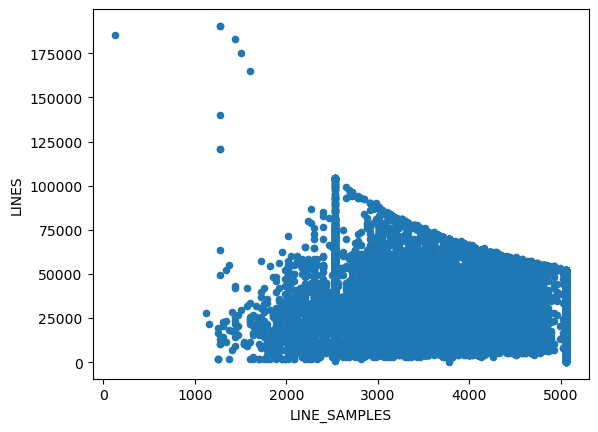

In [27]:
# use the matplotlib plots if hvplot is not available
ctx.plot.scatter(x="LINE_SAMPLES", y="LINES")